<a href="https://colab.research.google.com/github/BhavanaTK/ASL-Hand-Gesture-Detection-and-Speech-Conversion/blob/main/CNN_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from pandas import DataFrame

In [ ]:
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from skimage import io
from PIL import Image
X=[]
Y=[]
base_path='/content/gdrive/MyDrive/tomato/tomato/train'
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path = os.path.join(source_path, child)
  bsub_path = os.path.join(base_path, child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry = Image.open(os.path.join(sub_path, data_file))
      Qry = Qry.convert("RGB")
      Qry = np.array(Qry.resize((224,224)))
      Qry = Qry.reshape([224,224,3])
      #Qry = Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Target_Spot
Tomato___Early_blight
Tomato___Tomato_mosaic_virus
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Septoria_leaf_spot
Tomato___Leaf_Mold
Tomato___Late_blight
Tomato___healthy
Tomato___Bacterial_spot


In [ ]:
from skimage import io
from PIL import Image
X=[]
Y=[]
base_path='/content/gdrive/MyDrive/tomato/tomato/val'
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path = os.path.join(source_path, child)
  bsub_path = os.path.join(base_path, child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry = Image.open(os.path.join(sub_path, data_file))
      Qry = Qry.convert("RGB")
      Qry = np.array(Qry.resize((224,224)))
      Qry = Qry.reshape([224,224,3])
      #Qry = Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)

Tomato___Leaf_Mold
Tomato___Target_Spot
Tomato___Septoria_leaf_spot
Tomato___healthy
Tomato___Late_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight
Tomato___Bacterial_spot


In [ ]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr.shape

(1000, 224, 224, 3)

In [ ]:
images_arr = images_arr.reshape(-1, 224,224, 3)
images_arr = images_arr / np.max(images_arr)

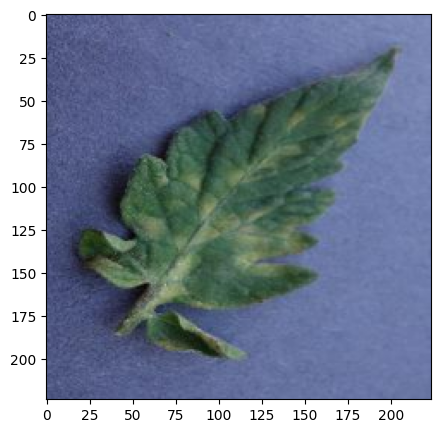

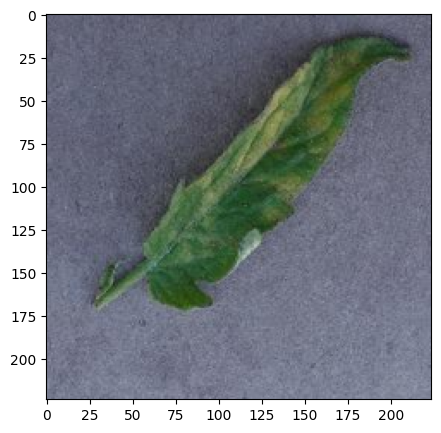

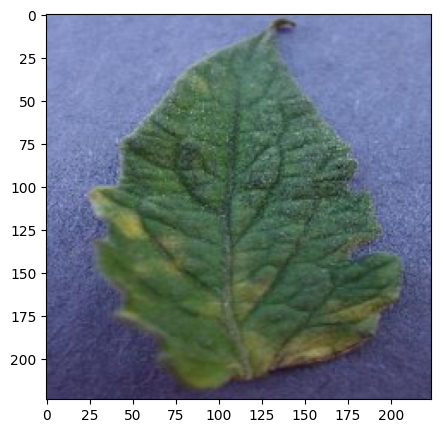

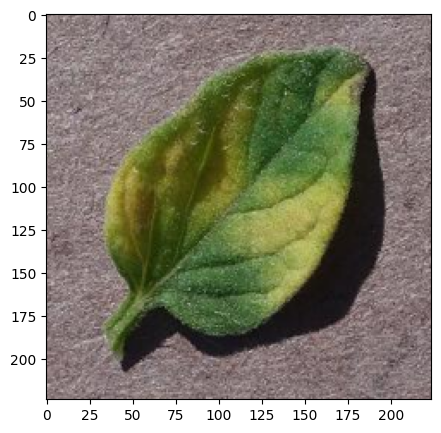

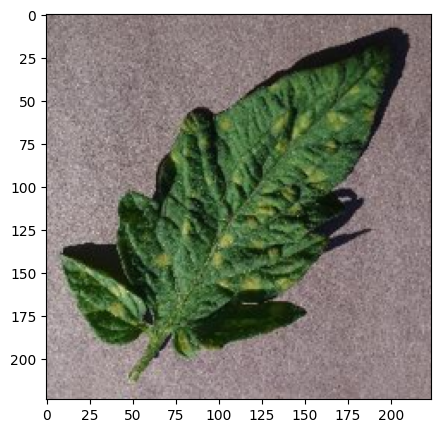

In [ ]:
# Display the first two images in training data
for i in range(5):
  plt.figure(figsize = [5,5])
  curr_img = np.reshape(images_arr[i], (224,224,3))
  plt.imshow(curr_img)
  plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_arr,y,test_size=0.2,random_state =42,stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [ ]:

cnnModel= Sequential()
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(224,224,3)))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
#cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(100,activation="relu"))
cnnModel.add(Dense(200,activation="relu"))
cnnModel.add(Dense(10,activation="softmax"))
cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     409728    
                                                      

In [ ]:
cnnModel.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = cnnModel.fit(X_train,y_train,epochs=70,batch_size=32,verbose=1,validation_split=0.15)

Epoch 1/70
22/22 [==============================] - 44s 846ms/step - loss: 3.0474 - accuracy: 0.0750 - val_loss: 2.3038 - val_accuracy: 0.0583
Epoch 2/70
22/22 [==============================] - 8s 361ms/step - loss: 2.3028 - accuracy: 0.1074 - val_loss: 2.3048 - val_accuracy: 0.0583
Epoch 3/70
22/22 [==============================] - 8s 359ms/step - loss: 2.3025 - accuracy: 0.1074 - val_loss: 2.3052 - val_accuracy: 0.0583
Epoch 4/70
22/22 [==============================] - 8s 362ms/step - loss: 2.3024 - accuracy: 0.1074 - val_loss: 2.3063 - val_accuracy: 0.0583
Epoch 5/70
22/22 [==============================] - 8s 363ms/step - loss: 2.3024 - accuracy: 0.1074 - val_loss: 2.3067 - val_accuracy: 0.0583
Epoch 6/70
22/22 [==============================] - 8s 364ms/step - loss: 2.3022 - accuracy: 0.1074 - val_loss: 2.3074 - val_accuracy: 0.0583
Epoch 7/70
22/22 [==============================] - 8s 353ms/step - loss: 2.3022 - accuracy: 0.1074 - val_loss: 2.3083 - val_accuracy: 0.0583
Epoch

In [ ]:
testLoss, testAccuracy = cnnModel.evaluate(X_test,y_test)
print("Test Accuracy =", testAccuracy)

7/7 [==============================] - 1s 91ms/step - loss: 2.3034 - accuracy: 0.1000
Test Accuracy = 0.10000000149011612


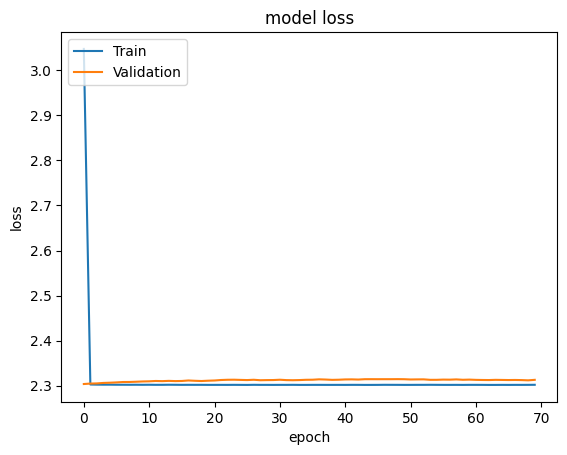

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

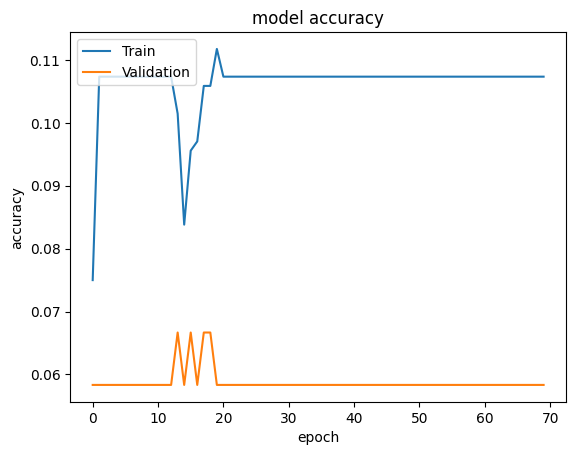

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
image = X[10]
image = image.reshape(-1, 224,224, 3)
image = image / np.max(image)

In [ ]:
pred = cnnModel.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

In [ ]:
cnnModel.save('cnnmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('cnnmodel.h5')
pred = model.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)


1/1 [==============================] - 0s 86ms/step
['Tomato___Leaf_Mold']
